#기본선언


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
test = '/content/gdrive/MyDrive/235626_컴퓨터 비전 학습 경진대회_data/test.csv'
train = '/content/gdrive/MyDrive/235626_컴퓨터 비전 학습 경진대회_data/train.csv'

#데이터 전처리

In [1]:
raw_test = pd.read_csv(test,encoding = 'CP949')
raw_train = pd.read_csv(train,encoding = 'CP949')
print(type(raw_test))
print(type(raw_train))
print(raw_test)
print(raw_train)

NameError: ignored

In [ ]:
print(raw_test)
print(raw_train)
train_img = raw_train.iloc[:,3:].to_numpy().reshape(-1,28,28)
train_img1 = raw_train.iloc[:,3:].to_numpy().reshape(-1,28,28,1)
train_digit = raw_train['digit']
train_letter = raw_train['letter']
test_img = raw_test.iloc[:,2:].to_numpy().reshape(-1,28,28)
test_img1 = raw_test.iloc[:,2:].to_numpy().reshape(-1,28,28,1)
test_letter = raw_test['letter']
train_digit = raw_train['digit']
print(type(train_digit))
print(type(train_letter))
print(type(test_letter))

          id letter  0  1  2  3  4  5  ...  776  777  778  779  780  781  782  783
0       2049      L  0  4  0  2  4  2  ...    4    2    2    4    3    4    1    4
1       2050      C  4  1  4  0  1  1  ...    2    4    2    4    2    2    1    2
2       2051      S  0  4  0  1  3  2  ...    2    0    3    2    3    0    1    4
3       2052      K  2  1  3  3  3  4  ...    3    2    4    1    0    4    4    4
4       2053      W  1  0  1  1  2  2  ...    1    4    0    2    1    2    3    4
...      ...    ... .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
20475  22524      P  1  2  1  1  0  0  ...    3    0    3    0    4    3    1    4
20476  22525      S  4  1  1  4  0  0  ...    1    0    0    1    3    1    2    0
20477  22526      B  4  2  1  3  2  1  ...    3    4    1    0    3    3    1    1
20478  22527      K  1  1  2  3  4  0  ...    0    4    3    3    3    4    4    2
20479  22528      S  2  1  0  3  0  3  ...    0    1    4    2    0    2    2    0

[20

#Normalization

In [ ]:
print(train_img.max())
print(test_img.max())
train = train_img/255
train1 = train_img1/255
test = test_img/255
test1 = test_img1/255
print(np.max(train[:,]))
print(np.max(test[:,]))
print(train.shape)
print(test.shape)

255
255
1.0
1.0
(2048, 28, 28)
(20480, 28, 28)


#특징벡터, 대상벡터 준비

In [ ]:
train_X = train_img
print(train_digit)
print(type(train_digit))
print(train_digit.to_numpy())
print(type(train_digit.to_numpy()))
train_y = train_digit.to_numpy()
test_X = test_img
print(type(train_X))


0       5
1       0
2       4
3       9
4       6
       ..
2043    6
2044    1
2045    9
2046    0
2047    5
Name: digit, Length: 2048, dtype: int64
<class 'pandas.core.series.Series'>
[5 0 4 ... 9 0 5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#Model 준비

#템플릿 활용

In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_X, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)


# loss, acc = model.evaluate(test, test)
# print("loss=",loss)
# print("acc=",acc)

# y_ = model.predict(test)
# predicted = np.argmax(y_, axis=1)

# print(predicted)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

KeyboardInterrupt: ignored

#Dense 조절, 오버피팅 처리방법 사용

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

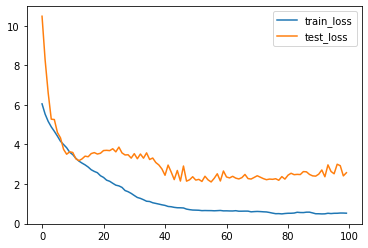

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


history = model.fit(train_X, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

#데이터 증강 사용

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state = 1004)

In [ ]:
test_image_datagen = ImageDataGenerator(
  rescale=1./255
)

In [ ]:
train_image_datagen = ImageDataGenerator(
  rescale=1./255, # 일반화
  rotation_range=10,  # 랜덤하게 이미지를 회전 (단위: 도, 0-180)
  zoom_range=0.1, # 랜덤하게 이미지 확대 (%)
  width_shift_range=0.1,  # 랜덤하게 이미지를 수평으로 이동 (%)
  height_shift_range=0.1,  # 랜덤하게 이미지를 수직으로 이동 (%)
)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)

(1750, 28, 28)
(1750,)
(195, 28, 28)


In [ ]:
train_X = train_X.reshape(1750,28,28,1)
val_X = val_X.reshape(195,28,28,1)
print(train_X.shape)
print(type(train_X))
print(val_X.shape)

(1750, 28, 28, 1)
<class 'numpy.ndarray'>
(195, 28, 28, 1)


#Test digit데이터가 없어Train set에서 데이터를 떼어 내 validation set을 만듬

In [ ]:
train_datagen = train_image_datagen.flow(
     x=train_X,
     y=train_y,
     batch_size=256,
     shuffle=True
)

In [ ]:
test_datagen = test_image_datagen.flow(
    x=val_X,
    y=val_y,
    batch_size=256,
    shuffle=False
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1000)             

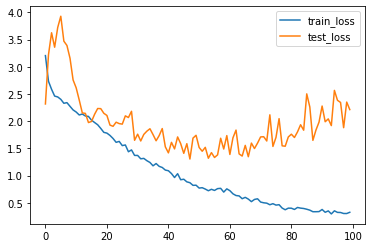

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(1000, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(train_datagen,
          validation_data= test_datagen,
          epochs=100)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

#Loss는 다소 낮아졌지만 Accuracy가 감소함

##Train set이 적은데 더 나누어서 그런듯 함

#성능 개선 방안

##-더 많은 train set을 모은다.
###-resnet18등 다른 모델을 적용해 본다.